In [79]:
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix



In [80]:

class LogisticRegression:
    def __init__(self, alpha=0.001, n_iters=10000, batch_size=None):
        self.alpha = alpha
        self.n_iters = n_iters
        self.batch_size = batch_size
        self.W = None
        self.b = None

    @staticmethod
    def sigmoid(n):
        return 1 / (1 + np.exp(-n))
    
    def compute_loss(self, y_true, y_pred):
        m = len(y_true)
        #loss = -np.sum(y_true * np.log(y_pred + 1e-15) + (1 - y_true) * np.log(1 - y_pred + 1e-15)) / m
        loss = -np.sum(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred)) / m
        return loss
  
    def compute_gradient(self, X, y, W, b):
        m = X.shape[0]
        f = np.dot(X, W) + b
        y_pred = LogisticRegression.sigmoid(f)
        dW = -(1/m) * np.dot(X.T, (y - y_pred))
        db = -(1/m) * np.sum(y - y_pred)
        return dW, db

    def update_weights(self, W, b, dW, db, alpha):
        W -= alpha * dW
        b -= alpha * db
        return W, b

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.W = np.zeros(n_features)
        self.b = 0

        for i in range(self.n_iters):
            indices = np.arange(n_samples)
            np.random.shuffle(indices)
            X_shuffled = X[indices]
            y_shuffled = y[indices]

            if self.batch_size is None:
                batch_size = n_samples 
            else:
                batch_size = self.batch_size

            for start in range(0, n_samples, batch_size):
                end = start + batch_size
                X_batch = X_shuffled[start:end]
                y_batch = y_shuffled[start:end]

                dW, db = self.compute_gradient(X_batch, y_batch, self.W, self.b)
                self.W, self.b = self.update_weights(self.W, self.b, dW, db, self.alpha)

            if i % 1000 == 0:
                y_pred = self.predict_prob(X)
                loss = self.compute_loss(y, y_pred)
                print(f"Iteracja {i}, loss: {loss:.6f}")



    def predict_prob(self, X):
        return self.sigmoid(np.dot(X, self.W) + self.b)

    def predict(self, X, threshold=0.5):
        return (self.predict_prob(X) >= threshold).astype(int)


In [81]:
# Wczytanie danych
heart_disease = fetch_ucirepo(id=45)
X = heart_disease.data.features
y = heart_disease.data.targets['num']
y = y.apply(lambda x: 0 if x == 0 else 1)

# Identyfikacja cech kategorycznych i liczbowych
categorical_cols = heart_disease.variables[heart_disease.variables['type'] == 'Categorical']['name'].tolist()
integer_cols = heart_disease.variables[heart_disease.variables['type'] == 'Integer']['name'].tolist()
if 'num' in integer_cols:
    integer_cols.remove('num')  

# Usunięcie wierszy z brakującymi wartościami
X = X.dropna()
y = y[X.index] 

print("Rozmiar macierzy cech przed: ", X.shape)

# One-hot encoding dla cech kategorycznych
X_encoded = pd.get_dummies(X, columns=categorical_cols, dtype=int)

# Macierz cech 
X_matrix = X_encoded.values
print(type(X_matrix))

print("\nRozmiar macierzy cech:", X_matrix.shape)

print(X_matrix[:5])

X_encoded.head()

Rozmiar macierzy cech przed:  (297, 13)
<class 'numpy.ndarray'>

Rozmiar macierzy cech: (297, 25)
[[ 63.  145.  233.  150.    2.3   0.    0.    1.    1.    0.    0.    0.
    0.    1.    0.    0.    1.    1.    0.    0.    0.    1.    0.    1.
    0. ]
 [ 67.  160.  286.  108.    1.5   3.    0.    1.    0.    0.    0.    1.
    1.    0.    0.    0.    1.    0.    1.    0.    1.    0.    1.    0.
    0. ]
 [ 67.  120.  229.  129.    2.6   2.    0.    1.    0.    0.    0.    1.
    1.    0.    0.    0.    1.    0.    1.    0.    1.    0.    0.    0.
    1. ]
 [ 37.  130.  250.  187.    3.5   0.    0.    1.    0.    0.    1.    0.
    1.    0.    1.    0.    0.    1.    0.    0.    0.    1.    1.    0.
    0. ]
 [ 41.  130.  204.  172.    1.4   0.    1.    0.    0.    1.    0.    0.
    1.    0.    0.    0.    1.    1.    0.    1.    0.    0.    1.    0.
    0. ]]


,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_1,cp_2,...,restecg_1,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3.0,thal_6.0,thal_7.0
0,63,145,233,150,2.3,0.0,0,1,1,0,...,0,1,1,0,0,0,1,0,1,0
1,67,160,286,108,1.5,3.0,0,1,0,0,...,0,1,0,1,0,1,0,1,0,0
2,67,120,229,129,2.6,2.0,0,1,0,0,...,0,1,0,1,0,1,0,0,0,1
3,37,130,250,187,3.5,0.0,0,1,0,0,...,0,0,1,0,0,0,1,1,0,0
4,41,130,204,172,1.4,0.0,1,0,0,1,...,0,1,1,0,1,0,0,1,0,0


Decydujemy się na MinMaxScaler, bo dane zawierają zarówno cechy liczbowe, jak i kategoryczne w postaci 0/1. StandardScaler mógłby nie zadziałać poprawnie w przypadku cech kategorycznych, równie mamy same dodadne dane. MinMax równie daje lepsze wyniki.

In [82]:

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)


In [83]:
model = LogisticRegression(alpha=0.001, n_iters=10000, batch_size=32)
model.fit(X_train_scaled, y_train.values)

y_pred = model.predict(X_test_scaled)


Iteracja 0, loss: 0.692326
Iteracja 1000, loss: 0.444378
Iteracja 2000, loss: 0.412433
Iteracja 3000, loss: 0.399278
Iteracja 4000, loss: 0.390815
Iteracja 5000, loss: 0.384319
Iteracja 6000, loss: 0.379017
Iteracja 7000, loss: 0.374558
Iteracja 8000, loss: 0.370743
Iteracja 9000, loss: 0.367421


Accuracy: 0.9166666666666666
Precision: 0.9130434782608695
Recall: 0.875
F1-score: 0.8936170212765957


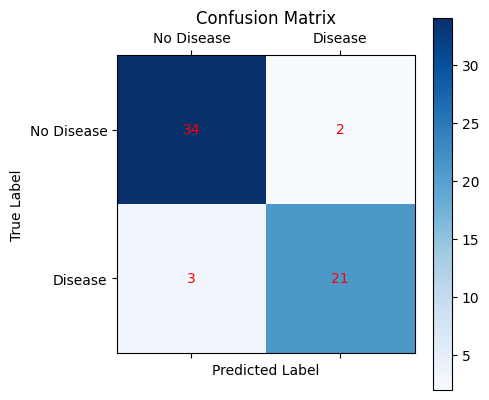

In [84]:
# Metryki klasyfikacji
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-score:", f1_score(y_test, y_pred))

#Wygenerowane przez LLM
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.xticks([0, 1], ['No Disease', 'Disease'])
plt.yticks([0, 1], ['No Disease', 'Disease'])
for (i, j), value in np.ndenumerate(cm):
    plt.text(j, i, value, ha='center', va='center', color='red')
plt.show()


In [85]:
weights_series = pd.Series(model.W, index=X_encoded.columns)

print("\nWyuczone wagi dla cech:")
print(weights_series.sort_values(ascending=False)) 
print("\nBias:", model.b)


Wyuczone wagi dla cech:
ca           1.950263
cp_4         0.769887
thal_7.0     0.728660
oldpeak      0.717443
trestbps     0.519703
sex_1        0.400656
slope_2      0.383794
age          0.319166
exang_1      0.289853
chol         0.177894
restecg_1    0.112827
cp_2         0.069612
fbs_0        0.062700
restecg_2    0.060159
slope_3     -0.012365
thal_6.0    -0.318012
fbs_1       -0.318129
cp_1        -0.345038
restecg_0   -0.428415
exang_0     -0.545282
slope_1     -0.626857
sex_0       -0.656085
thal_3.0    -0.666077
thalach     -0.738976
cp_3        -0.749890
dtype: float64

Bias: -0.25542877606418




#### **najbardziej zwiększające prawdopodobieństwo choroby**
| Cecha      | Waga   | Opis |
|------------|--------|------|
| ca         | 1.9485 | Liczba głównych naczyń uwidocznionych w fluoroskopii |
| cp_4       | 0.7681 | Typ bólu w klatce piersiowej: bezobjawowy |
| thal_7.0   | 0.7292 | Wskaźnik perfuzji: defekt odwracalny |


#### **najmniej wpływające na predykcję** 
| Cecha      | Waga    | Opis |
|------------|---------|------|
| slope_3    | -0.0126 | Nachylenie szczytowego odcinka ST w dół |
| fbs_0      | 0.0625  | Cukier na czczo ≤ 120 mg/dl |
| restecg_2  | 0.0614  | Wyniki spoczynkowego EKG: prawdopodobne/pewne przerosty lewej komory |



#### **najbardziej zmniejszające prawdopodobieństwo choroby** 
| Cecha      | Waga    | Opis |
|------------|---------|------|
| cp_3       | -0.7481 | Typ bólu w klatce piersiowej: ból nie-dusznicowy |
| thalach    | -0.7413 | Maksymalne osiągnięte tętno |
| thal_3.0   | -0.6667 | Wskaźnik perfuzji: normalny |

